# Classifying movie reviews

Classify movie reviews as positive or negative, based on the text content of the reviews.

Using IMDB dataset in Keras. Preprocessed, reviews have been turned into a sequence of integers, where each interger stands for a specific word in a dictionary.


In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 
x_val = x_test[:5000]
x_test = x_test[5000:]

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_val = y_test[:5000]
y_test = y_test[5000:]

## Model size
1. Original model:

In [3]:
from keras import models
from keras import layers

ori_model = models.Sequential()
ori_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
ori_model.add(layers.Dense(16, activation='relu'))
ori_model.add(layers.Dense(1, activation='sigmoid'))

ori_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

2. Smaller network: 

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
original_hist = ori_model.fit(x_train, y_train,
                              epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
49/49 [==============================] - 3s 66ms/step - loss: 0.4622 - accuracy: 0.8206 - val_loss: 0.3439 - val_accuracy: 0.8766
Epoch 2/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2638 - accuracy: 0.9089 - val_loss: 0.2911 - val_accuracy: 0.8854
Epoch 3/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2033 - accuracy: 0.9263 - val_loss: 0.2834 - val_accuracy: 0.8850
Epoch 4/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1692 - accuracy: 0.9409 - val_loss: 0.2941 - val_accuracy: 0.8820
Epoch 5/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1477 - accuracy: 0.9487 - val_loss: 0.3158 - val_accuracy: 0.8754
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1280 - accuracy: 0.9554 - val_loss: 0.3393 - val_accuracy: 0.8734
Epoch 7/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1142 - accuracy: 0.9614 - val_loss: 0.3561 - val_accuracy: 0.8714
Epoch 8/20
49

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                              epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
49/49 [==============================] - 1s 29ms/step - loss: 0.5263 - accuracy: 0.8068 - val_loss: 0.4390 - val_accuracy: 0.8550
Epoch 2/20
49/49 [==============================] - 1s 27ms/step - loss: 0.3563 - accuracy: 0.8887 - val_loss: 0.3482 - val_accuracy: 0.8752
Epoch 3/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2778 - accuracy: 0.9091 - val_loss: 0.3065 - val_accuracy: 0.8848
Epoch 4/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2328 - accuracy: 0.9209 - val_loss: 0.2878 - val_accuracy: 0.8880
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2032 - accuracy: 0.9308 - val_loss: 0.2802 - val_accuracy: 0.8886
Epoch 6/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1810 - accuracy: 0.9387 - val_loss: 0.2796 - val_accuracy: 0.8880
Epoch 7/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1648 - accuracy: 0.9443 - val_loss: 0.2840 - val_accuracy: 0.8872
Epoch 8/20
49

In [7]:
epochs = range(1,21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_hist = smaller_model_hist.history['val_loss']

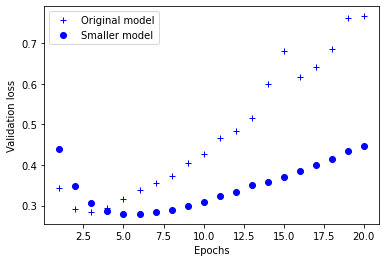

In [8]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_hist, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

3. Bigger model:

In [9]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
bigger_model_hist = bigger_model.fit(x_train, y_train, epochs=20,
                                     batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
49/49 [==============================] - 3s 51ms/step - loss: 0.4599 - accuracy: 0.7842 - val_loss: 0.3784 - val_accuracy: 0.8258
Epoch 2/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2186 - accuracy: 0.9146 - val_loss: 0.4287 - val_accuracy: 0.8114
Epoch 3/20
49/49 [==============================] - 2s 41ms/step - loss: 0.1280 - accuracy: 0.9526 - val_loss: 0.4216 - val_accuracy: 0.8478
Epoch 4/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0655 - accuracy: 0.9819 - val_loss: 0.5009 - val_accuracy: 0.8644
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0874 - accuracy: 0.9862 - val_loss: 0.4726 - val_accuracy: 0.8800
Epoch 6/20
49/49 [==============================] - 2s 37ms/step - loss: 0.0550 - accuracy: 0.9891 - val_loss: 0.4447 - val_accuracy: 0.8774
Epoch 7/20
49/49 [==============================] - 2s 43ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7049 - val_accuracy: 0.8740
Epoch 8/20
49

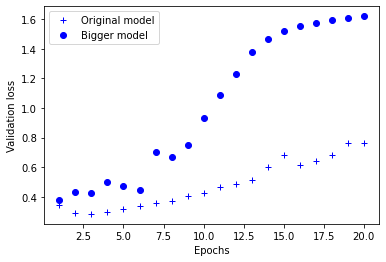

In [11]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

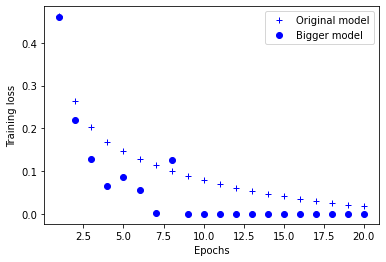

In [12]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()
plt.show()

## Adding weight regularization

Add L2 regularization: 

In [13]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [15]:
l2_model_hist = l2_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
49/49 [==============================] - 3s 54ms/step - loss: 0.4851 - acc: 0.8288 - val_loss: 0.3798 - val_acc: 0.8808
Epoch 2/20
49/49 [==============================] - 1s 25ms/step - loss: 0.3170 - acc: 0.9033 - val_loss: 0.3423 - val_acc: 0.8858
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2719 - acc: 0.9204 - val_loss: 0.3366 - val_acc: 0.8838
Epoch 4/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2529 - acc: 0.9269 - val_loss: 0.3555 - val_acc: 0.8768
Epoch 5/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2374 - acc: 0.9360 - val_loss: 0.3813 - val_acc: 0.8678
Epoch 6/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2316 - acc: 0.9363 - val_loss: 0.3888 - val_acc: 0.8666
Epoch 7/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2247 - acc: 0.9384 - val_loss: 0.3835 - val_acc: 0.8724
Epoch 8/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2188 - a

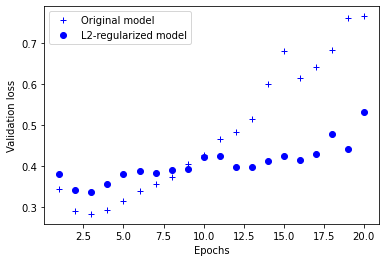

In [16]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

Different weight regularizers:

In [17]:
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

## Adding dropout

In [18]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [19]:
dpt_model_hist = dpt_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
49/49 [==============================] - 2s 42ms/step - loss: 0.6122 - acc: 0.6681 - val_loss: 0.4895 - val_acc: 0.8600
Epoch 2/20
49/49 [==============================] - 2s 31ms/step - loss: 0.4699 - acc: 0.8044 - val_loss: 0.3722 - val_acc: 0.8722
Epoch 3/20
49/49 [==============================] - 1s 27ms/step - loss: 0.3823 - acc: 0.8560 - val_loss: 0.3150 - val_acc: 0.8768
Epoch 4/20
49/49 [==============================] - 1s 29ms/step - loss: 0.3190 - acc: 0.8840 - val_loss: 0.2911 - val_acc: 0.8920
Epoch 5/20
49/49 [==============================] - 2s 31ms/step - loss: 0.2741 - acc: 0.9035 - val_loss: 0.2856 - val_acc: 0.8886
Epoch 6/20
49/49 [==============================] - 5s 105ms/step - loss: 0.2459 - acc: 0.9124 - val_loss: 0.2863 - val_acc: 0.8882
Epoch 7/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2189 - acc: 0.9242 - val_loss: 0.3031 - val_acc: 0.8856
Epoch 8/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2052 - 

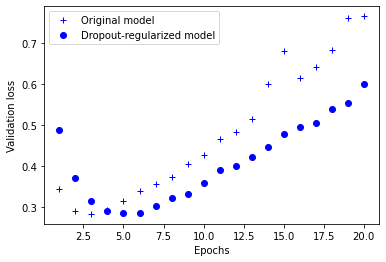

In [20]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()